In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm
import scipy.stats as sps
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

%matplotlib inline

## Задача 1

## Задача 2

![2](./3-2.jpg)

## Задача 3

In [82]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/vowel/vowel-context.data

--2018-03-15 02:23:19--  http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/vowel/vowel-context.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73565 (72K) [text/plain]
Saving to: ‘vowel-context.data’

vowel-context.data  100%[===================>]  71.84K   167KB/s    in 0.4s    

2018-03-15 02:23:20 (167 KB/s) - ‘vowel-context.data’ saved [73565/73565]



In [88]:
data = []
with open('./vowel-context.data') as f:
    for line in f:
        data.append(list(map(float, line.strip().split())))

data = np.array(data)
sample = data[:, 7]

In [89]:
print(len(sample))
print(sample[:10])

990
[-0.168 -0.265 -0.707 -1.053 -1.633 -1.588 -1.995 -1.815 -0.675  0.065]


Для начала построим гистограмму нашей выборки

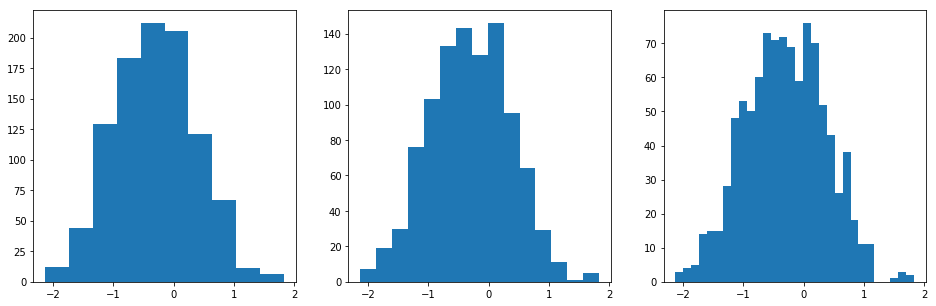

In [94]:
plt.figure(figsize=(16, 5))
for subpl, n_bins in zip([1, 2, 3], [None, 15, 30]):
    plt.subplot(1, 3, subpl)
    plt.hist(sample, bins=n_bins)
plt.show()

In [95]:
def plot_hist_and_qq(sample, dist="norm", sparams=(), bins=20):
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.hist(sample, bins=bins, normed=True)
    plt.subplot(1, 2, 2)
    sps.probplot(sample, sparams=(), plot=plt, dist=dist)
    plt.show()

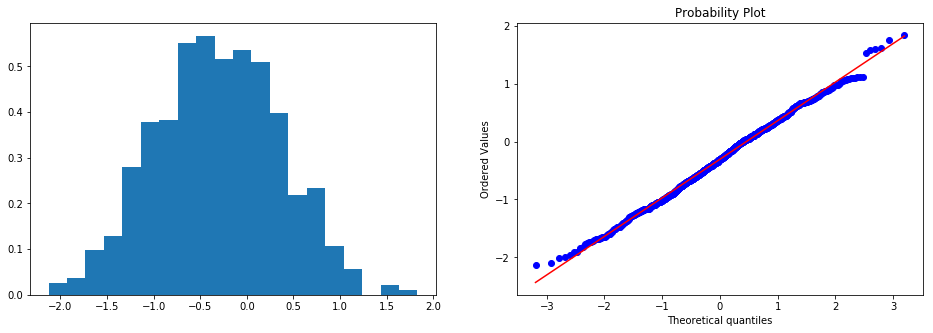

In [96]:
plot_hist_and_qq(sample, dist="norm", bins=20)

Как видим (точки неплохо ложаться на прямую) есть основание предположить, что это нормально распределенные данные.

In [97]:
W, p_value = sps.shapiro(sample)
print(p_value)

0.07086192816495895


Т.к. $p_{value} > 0.05$, то гипотезу $H_0: X$~$N(a, \sigma^2)$ не отвергаем

Оценим параметры $a=\overline{X}, \sigma^2=S^2$

In [112]:
mean = sample.mean()
std = sample.std()
sps.kstest(sample, cdf=sps.norm(mean, std).cdf)

KstestResult(statistic=0.02721986160737322, pvalue=0.45296660263978694)

In [126]:
print('Ответ: Нормальное распределение со средним={:.2f} и дисперсией={:.2f}'.format(mean, std))

Ответ: Нормальное распределение со средним=-0.31 и дисперсией=0.66


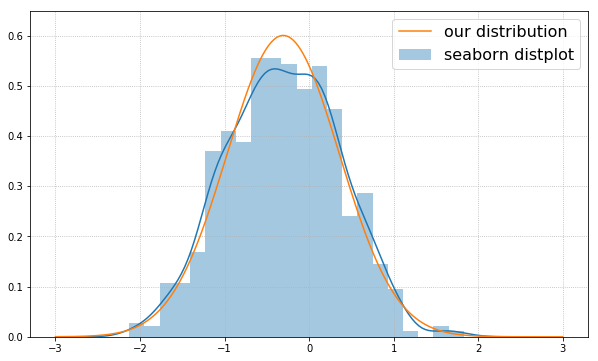

In [125]:
plt.figure(figsize=(10, 6))
x = np.linspace(-3, 3, 1000)
sns.distplot(sample, label='seaborn distplot')
distribution = sps.norm(loc=mean, scale=std).pdf(x)
plt.plot(x,distribution, label='our distribution')
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.ylim((None, 0.65))
plt.show()

## Задача 4

In [130]:
df = pd.read_csv('./GPS Trajectory/go_track_tracks.csv', index_col=None)
df[:2]

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN


In [158]:
sample = df['distance'].values
print(len(sample))
print(sample[:10])

163
[2.652 5.29  0.918 7.7   3.995 0.009 8.402 0.675 8.111 0.027]


Для начала построим гистограмму нашей выборки

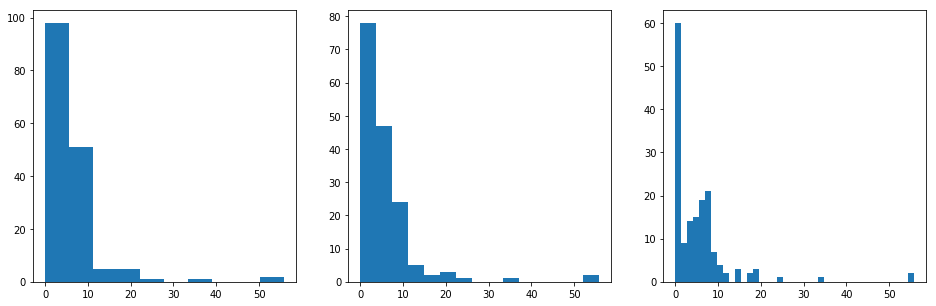

In [275]:
plt.figure(figsize=(16, 5))
for subpl, n_bins in zip([1, 2, 3], [None, 15, 40]):
    plt.subplot(1, 3, subpl)
    plt.hist(sample, bins=n_bins)
plt.show()

Логарифм выборки

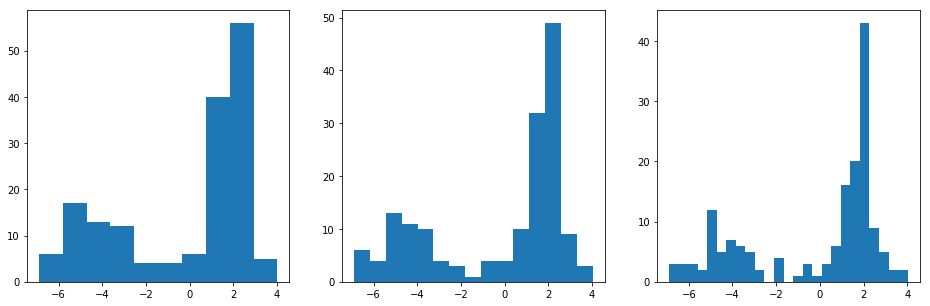

In [271]:
plt.figure(figsize=(16, 5))
for subpl, n_bins in zip([1, 2, 3], [None, 15, 25]):
    plt.subplot(1, 3, subpl)
    plt.hist(np.log(sample), bins=n_bins)
plt.show()

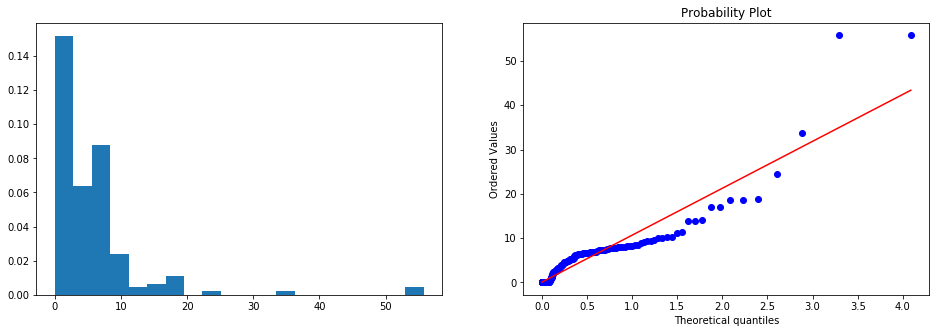

In [265]:
plot_hist_and_qq(sample, dist=sps.gamma(a=0.5), bins=20)

In [165]:
mean = sample.mean()
std = sample.std()
sps.kstest(sample, cdf=sps.expon(1/mean).cdf)

KstestResult(statistic=0.5177607244412787, pvalue=0.0)

## Задача 5

In [188]:
def test_level_student(x):
    return 1 - sps.t(10).cdf(x)

In [196]:
def anderson_vs_kstest(size_sample):
    norm_sample = sps.norm.rvs(size=size_sample)
    stat, critical_values, significance_levels = sps.anderson(norm_sample)
    for i in range(len(significance_levels)):
        print('Уровень значимости={:.2f}'.format(significance_levels[i] / 100), end=' ')
        print('критический уровень={:.3f}'.format(critical_values[i]), end=' ')
        print('мощность критерия Андресона={:.3f}'.format(test_level_student(critical_values[i])))
        
        stat, pval = sps.kstest(norm_sample, cdf=sps.t(10).cdf)
    print("Колмогорова-Смирнова: %f" % pval)

In [217]:
for size in [10, 25, 100, 500, 1000, 5000, 10000]:
    print('{:_^90}\n'.format('sample size = {}'.format(size)))
    anderson_vs_kstest(size)
    print('\n')

_____________________________________sample size = 10_____________________________________

Уровень значимости=0.15 критический уровень=0.501 мощность критерия Андресона=0.314
Уровень значимости=0.10 критический уровень=0.570 мощность критерия Андресона=0.291
Уровень значимости=0.05 критический уровень=0.684 мощность критерия Андресона=0.255
Уровень значимости=0.03 критический уровень=0.798 мощность критерия Андресона=0.222
Уровень значимости=0.01 критический уровень=0.950 мощность критерия Андресона=0.182
Колмогорова-Смирнова: 0.146372


_____________________________________sample size = 25_____________________________________

Уровень значимости=0.15 критический уровень=0.514 мощность критерия Андресона=0.309
Уровень значимости=0.10 критический уровень=0.586 мощность критерия Андресона=0.285
Уровень значимости=0.05 критический уровень=0.703 мощность критерия Андресона=0.249
Уровень значимости=0.03 критический уровень=0.820 мощность критерия Андресона=0.216
Уровень значимости=0.01 кри

In [198]:
anderson_vs_kstest(100)

Уровень значимости=0.15 критический уровень=0.555 мощность критерия Андресона=0.296
Уровень значимости=0.10 критический уровень=0.632 мощность критерия Андресона=0.271
Уровень значимости=0.05 критический уровень=0.759 мощность критерия Андресона=0.233
Уровень значимости=0.03 критический уровень=0.885 мощность критерия Андресона=0.198
Уровень значимости=0.01 критический уровень=1.053 мощность критерия Андресона=0.159
Колмогорова-Смирнова: 0.784356


In [199]:
anderson_vs_kstest(500)

Уровень значимости=0.15 критический уровень=0.571 мощность критерия Андресона=0.290
Уровень значимости=0.10 критический уровень=0.651 мощность критерия Андресона=0.265
Уровень значимости=0.05 критический уровень=0.781 мощность критерия Андресона=0.226
Уровень значимости=0.03 критический уровень=0.911 мощность критерия Андресона=0.192
Уровень значимости=0.01 критический уровень=1.083 мощность критерия Андресона=0.152
Колмогорова-Смирнова: 0.415829


In [200]:
anderson_vs_kstest(1000)

Уровень значимости=0.15 критический уровень=0.574 мощность критерия Андресона=0.289
Уровень значимости=0.10 критический уровень=0.653 мощность критерия Андресона=0.264
Уровень значимости=0.05 критический уровень=0.784 мощность критерия Андресона=0.226
Уровень значимости=0.03 критический уровень=0.914 мощность критерия Андресона=0.191
Уровень значимости=0.01 критический уровень=1.088 мощность критерия Андресона=0.151
Колмогорова-Смирнова: 0.530785


In [201]:
anderson_vs_kstest(2000)

Уровень значимости=0.15 критический уровень=0.575 мощность критерия Андресона=0.289
Уровень значимости=0.10 критический уровень=0.655 мощность критерия Андресона=0.264
Уровень значимости=0.05 критический уровень=0.785 мощность критерия Андресона=0.225
Уровень значимости=0.03 критический уровень=0.916 мощность критерия Андресона=0.191
Уровень значимости=0.01 критический уровень=1.090 мощность критерия Андресона=0.151
Колмогорова-Смирнова: 0.042717


Колмогоров-Смирнов очень сильно зависит от выборки:

In [225]:
ks_critical = []
anderson_critical = []

for i in range(200):
    norm_sample = sps.norm.rvs(size=1000)
    stats, pval = sps.kstest(norm_sample, cdf=sps.t(10).cdf)
    ks_critical.append(pval)

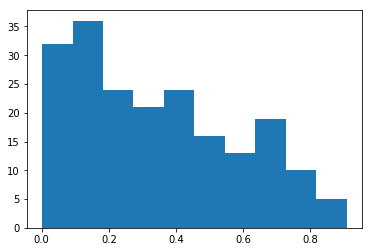

In [226]:
plt.hist(ks_critical)
plt.show()

В то время, как у критерия Андресона критический уровень почти не меняется